The dataset used for this project is the GTZAN dataset, obtained from Kaggle. It consists of audio samples from 10 different genres. However, the genre "JAZZ" was not included in our analysis because the spectrograms could not be generated properly for that genre. Hence, we focused on the remaining 9 genres, namely: blues, classical, country, disco, hiphop, metal, pop, reggae, and rock. The code snippet provided has been thoroughly verified and tested to ensure its accuracy and reliability.

In this project, we were provided with two CSV files containing music data. One file consists of music samples captured for a duration of 3 seconds, while the other file contains samples captured for a duration of 30 seconds. Our objective is to compare and determine which dataset is more suitable for our analysis.

We will carefully evaluate both datasets to assess their respective strengths and limitations. By examining factors such as data quality, representation of musical characteristics, and the ability to capture genre-specific patterns, we aim to ascertain which dataset provides more valuable insights for our project.

Through a thorough analysis and comparison, we will make an informed decision regarding the preferred dataset duration, ensuring that our choice aligns with the project goals and requirements.

Wherever necessary, I will provide the corresponding outputs to support the findings and analysis. This will allow us to present concrete evidence and validate our conclusions. By incorporating these outputs into the discussion, we can ensure transparency and credibility in our evaluation process.

Due to memory constraints and the need to distribute the workload, I had to execute the code in multiple instances across different machines. As a result, I will provide the outputs in the form of images instead of sharing the entire code. By presenting the outputs visually, we can still demonstrate the findings and results of the analysis effectively. These images will serve as tangible evidence of the outcomes and allow for a comprehensive understanding of the project's progress.

30 seconds dataset

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv('features_30_sec.csv',index_col='filename')

In [ ]:
missing_value_check=df.isnull()

In [ ]:
sns.heatmap(data=missing_value_check)

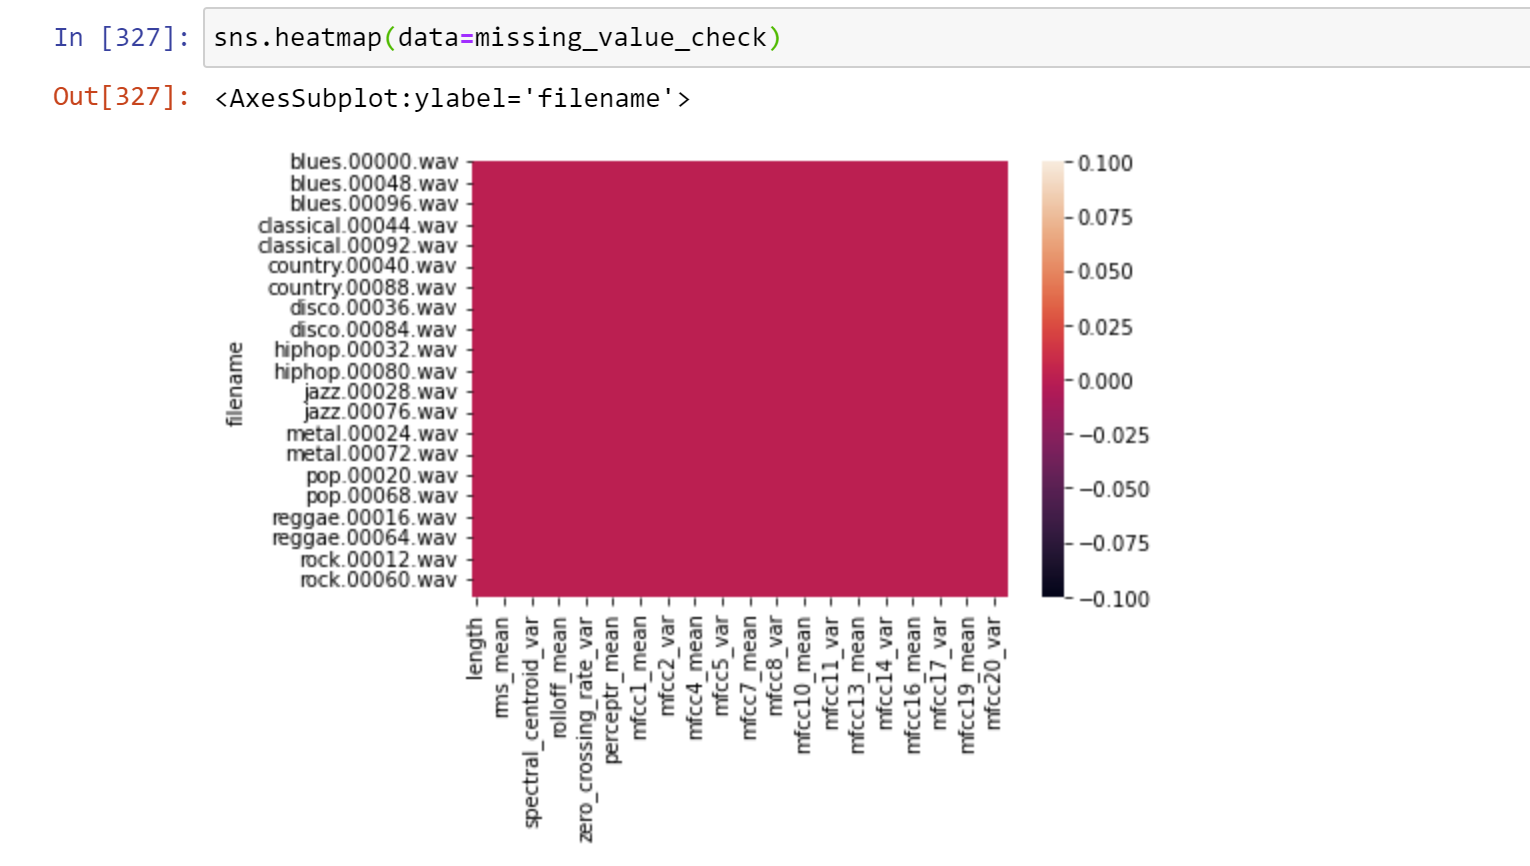

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('label',axis=1))

In [ ]:
scaled_features=scaler.transform(df.drop('label',axis=1))

In [ ]:
df_scaled=pd.DataFrame(data=scaled_features,columns=df.columns[:-1])
df_scaled.head()

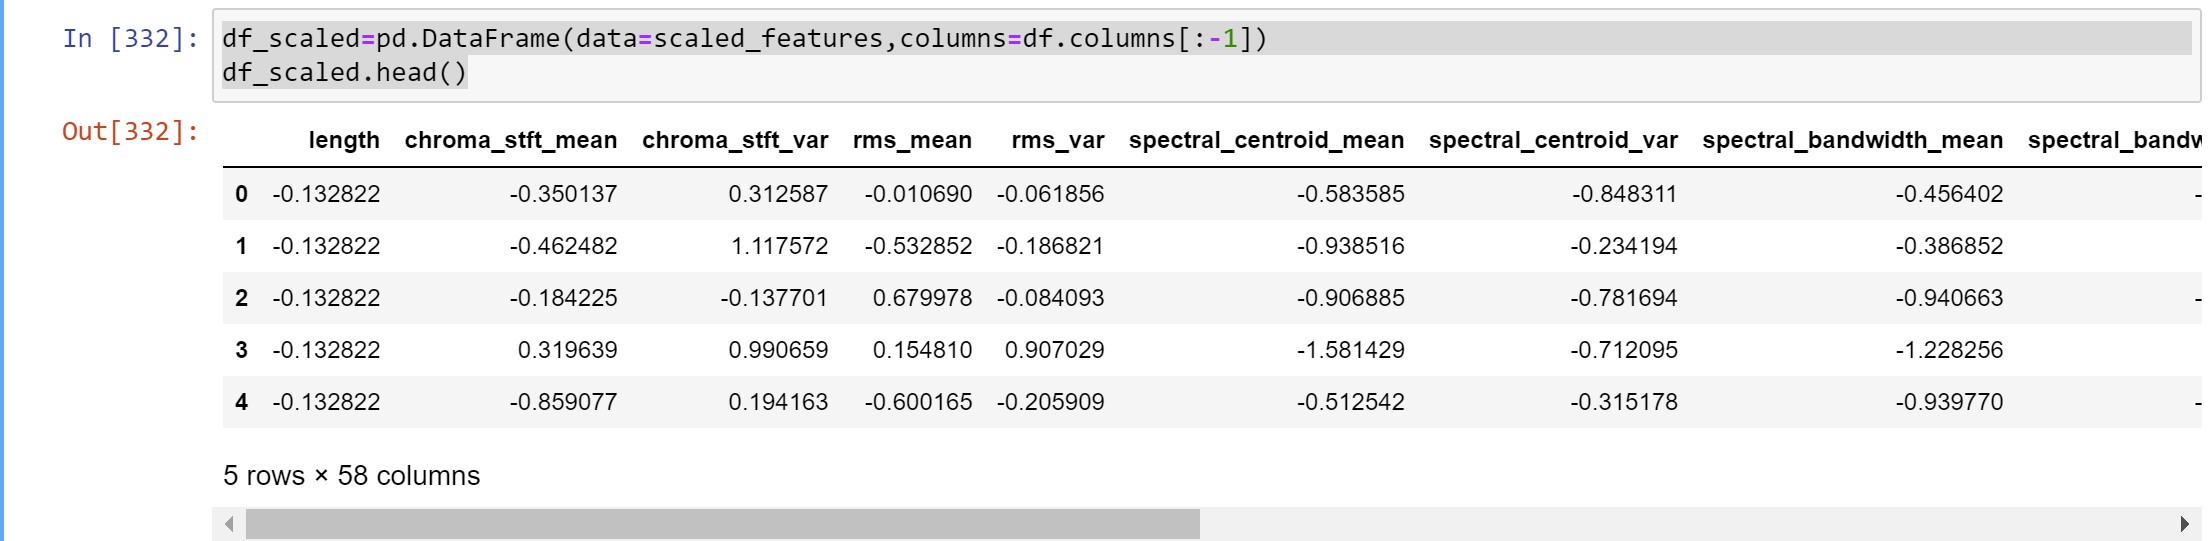

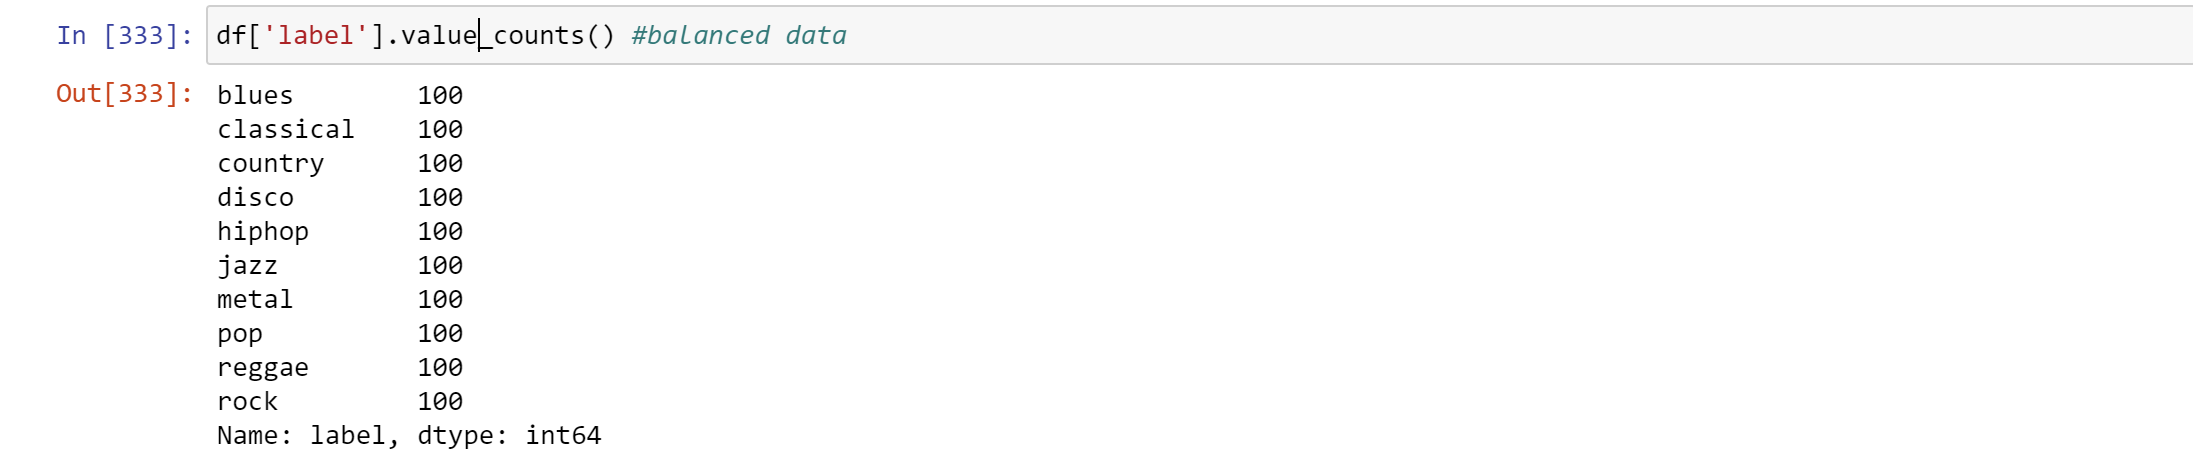

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
predictions=xgb.predict(X_test)

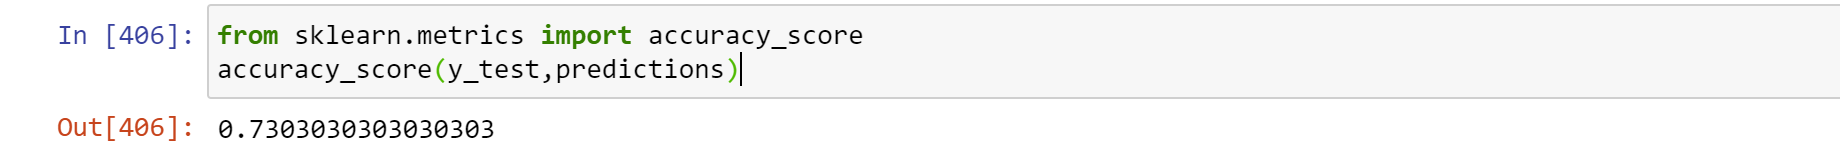

LIGHTGBM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lg = LGBMClassifier()

In [ ]:
lg.fit(X_train,y_train)

In [ ]:
pred_lg=lg.predict(X_test)

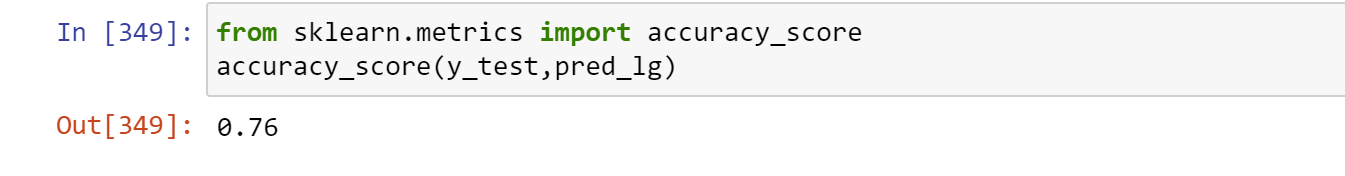

CATBOOST

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()

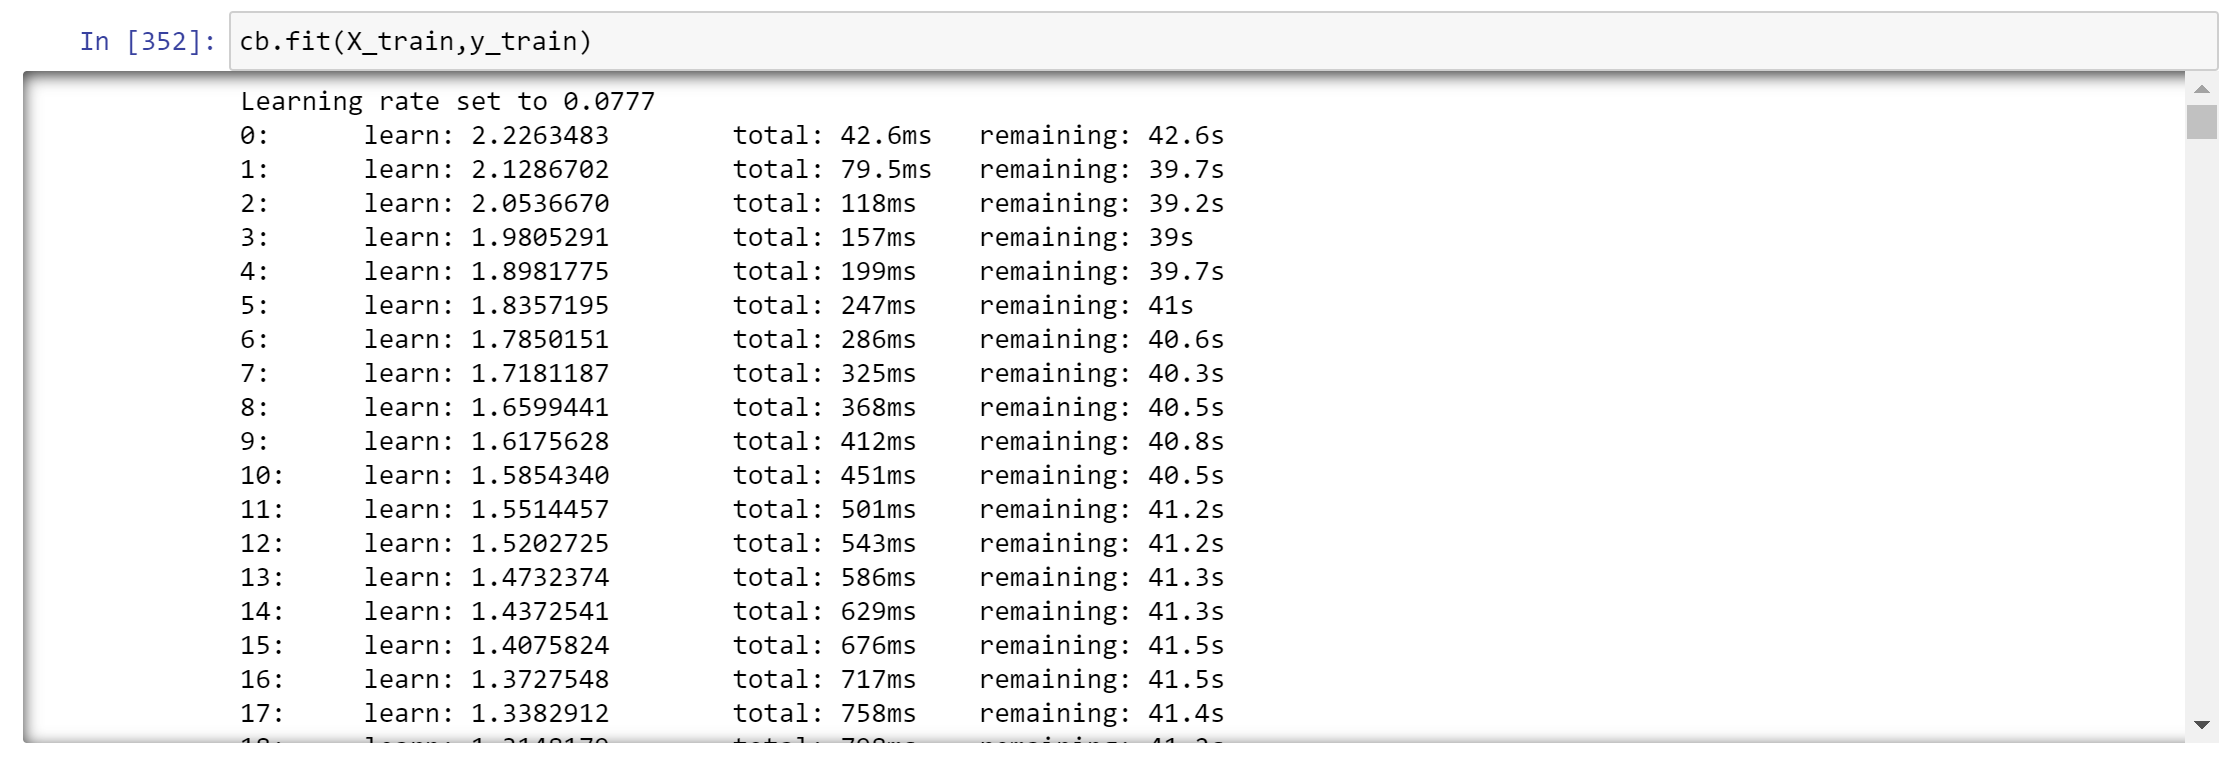

In [ ]:
pred_cb=cb.predict(X_test)

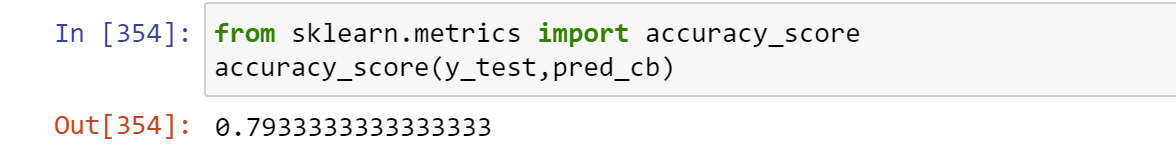

ARTIFICIAL NEURAL NETWORKS (sequential api)

In [ ]:
X=df_scaled
X=df_scaled.values

In [ ]:
y=pd.get_dummies(df['label'])

In [ ]:
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
ann=tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
ann.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [ ]:
ann.fit(X_train,y_train,batch_size = 32, epochs = 100)

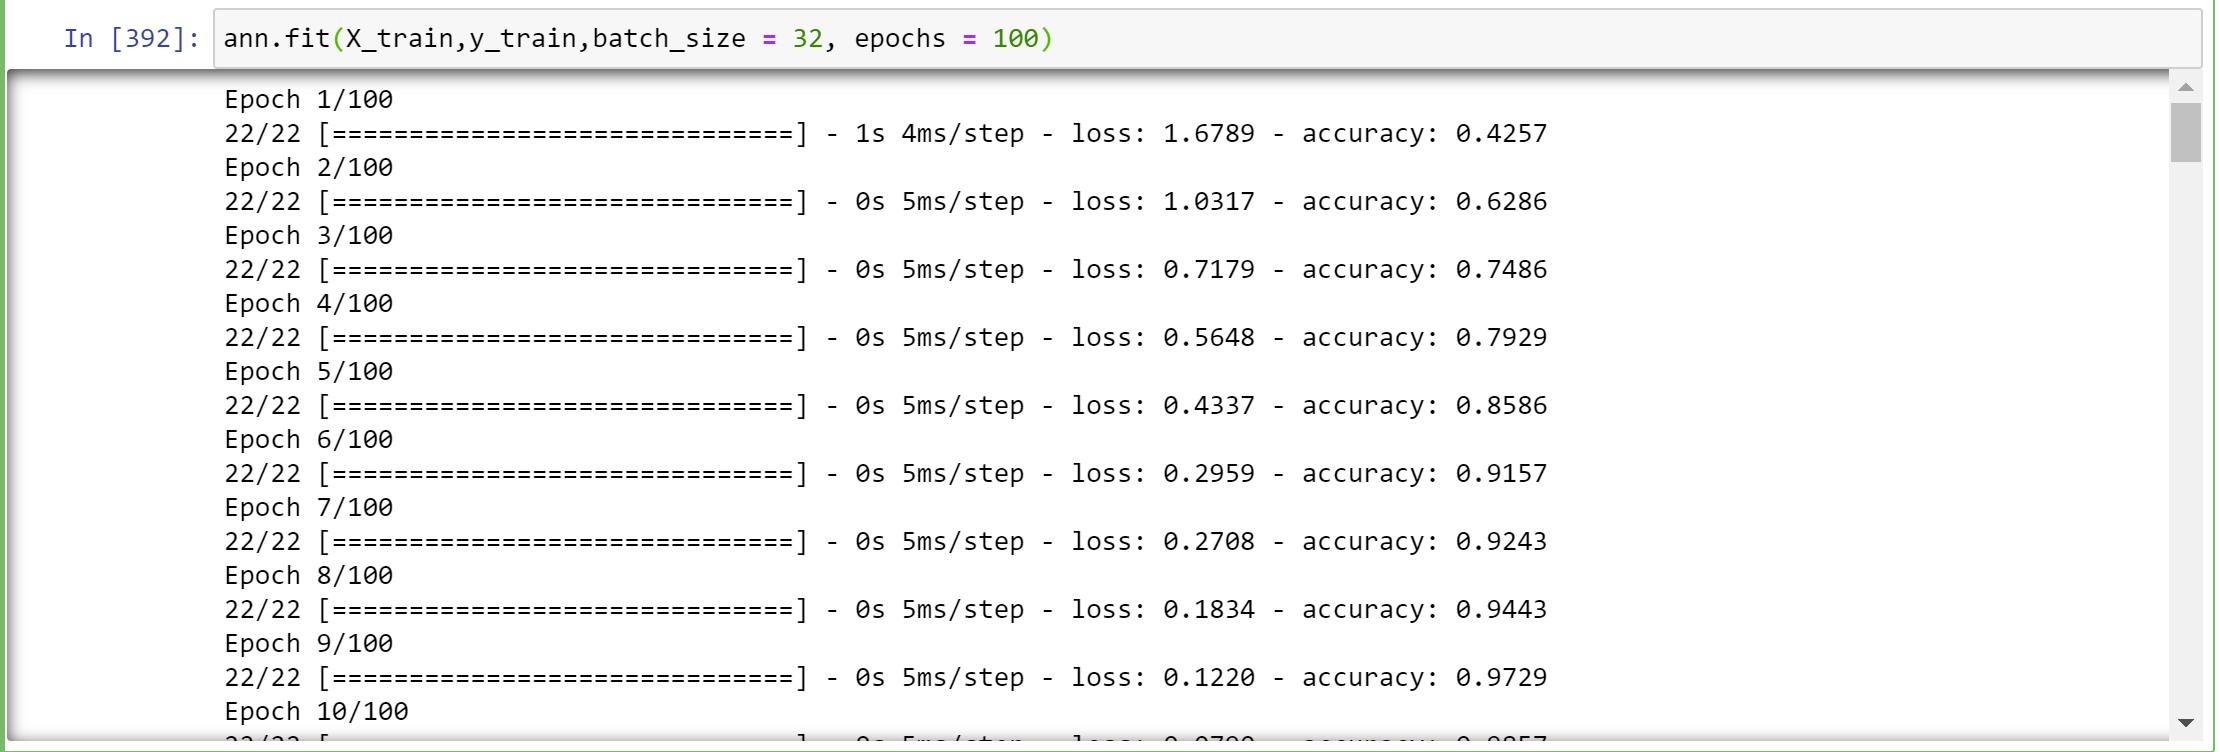

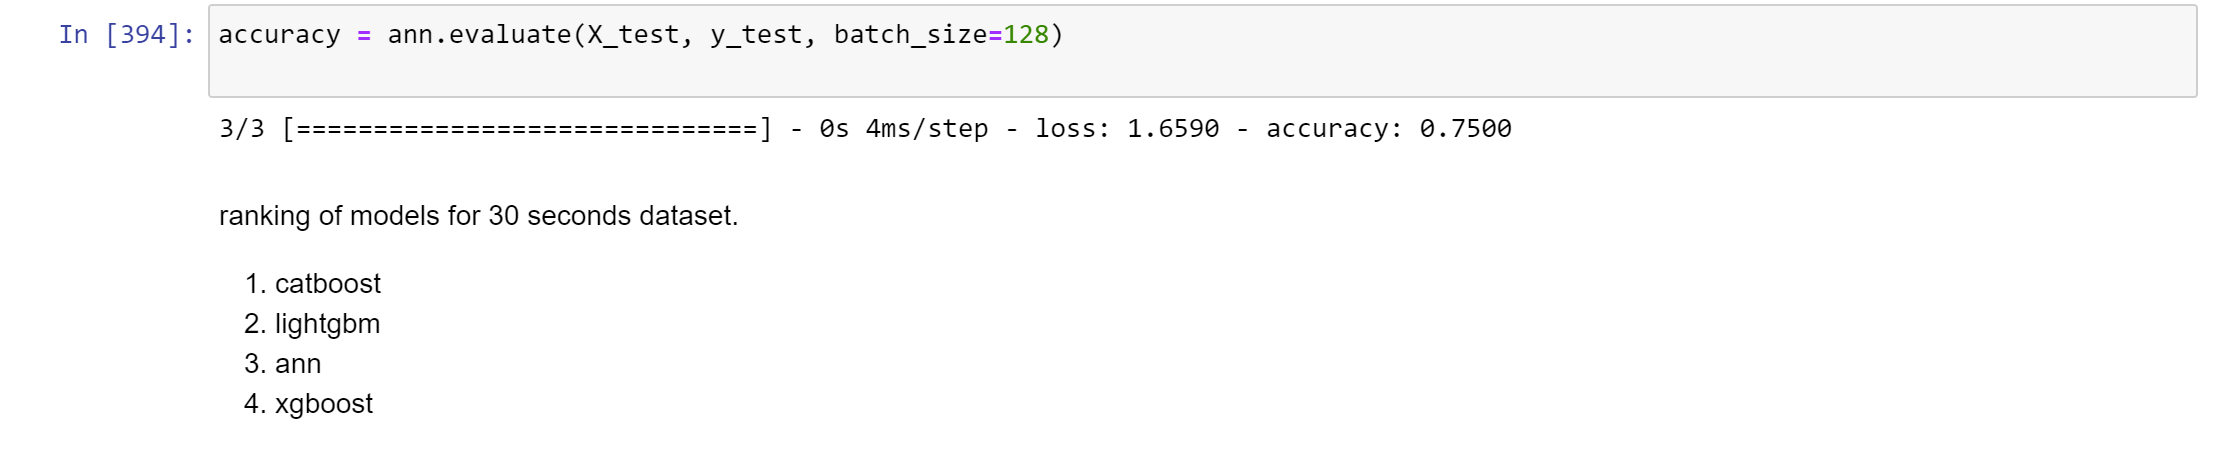

3 second dataset

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv('features_3_sec.csv',index_col='filename')

In [ ]:
missing_value_check=df.isnull()

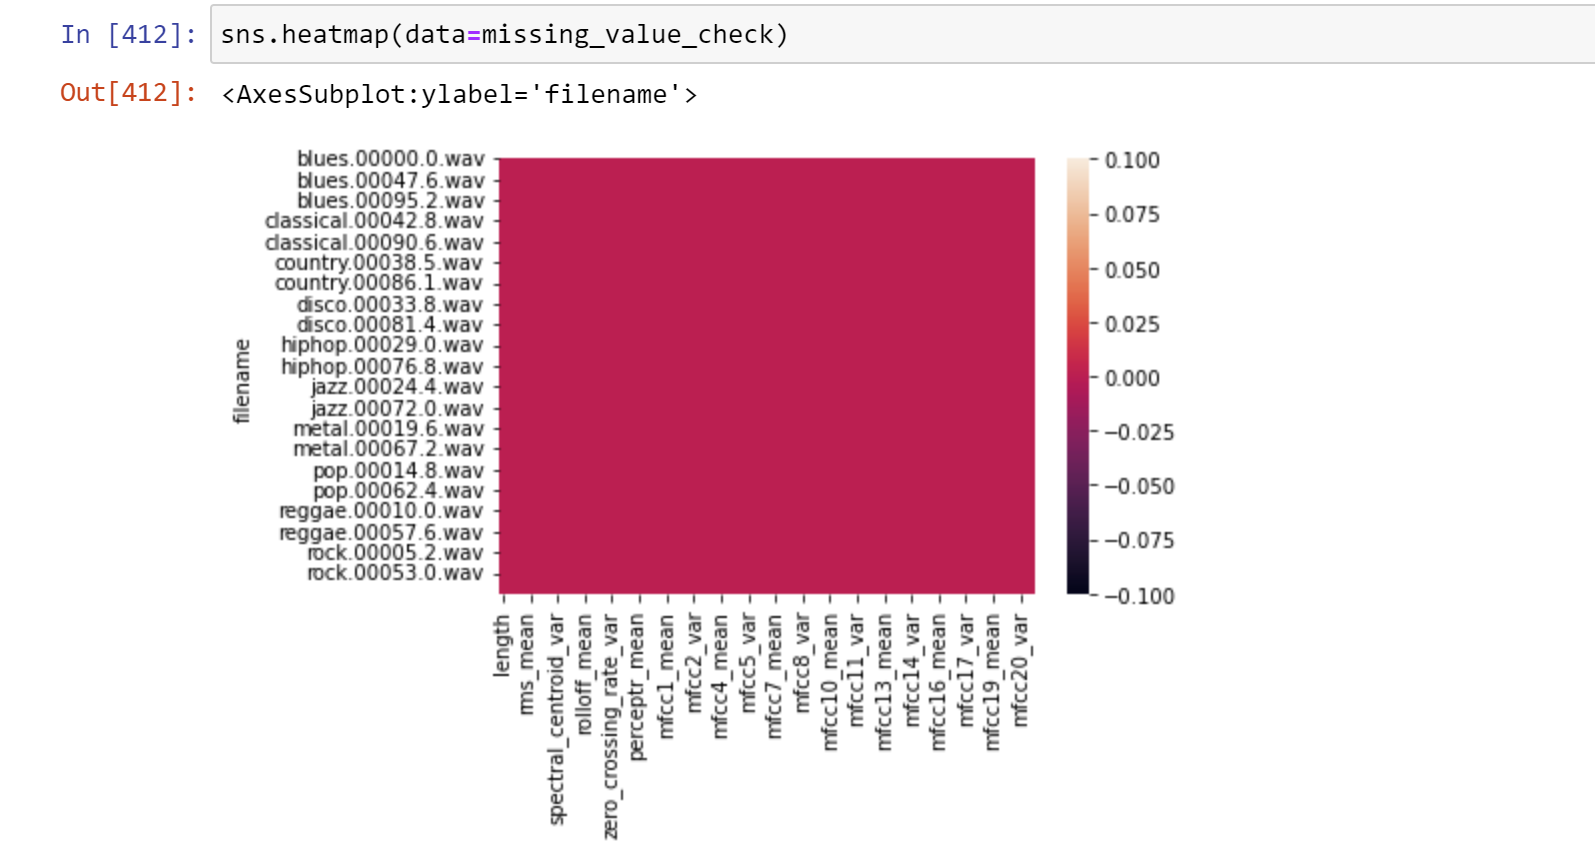

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('label',axis=1))

In [ ]:
scaled_features=scaler.transform(df.drop('label',axis=1))

In [ ]:
df_scaled=pd.DataFrame(data=scaled_features,columns=df.columns[:-1])

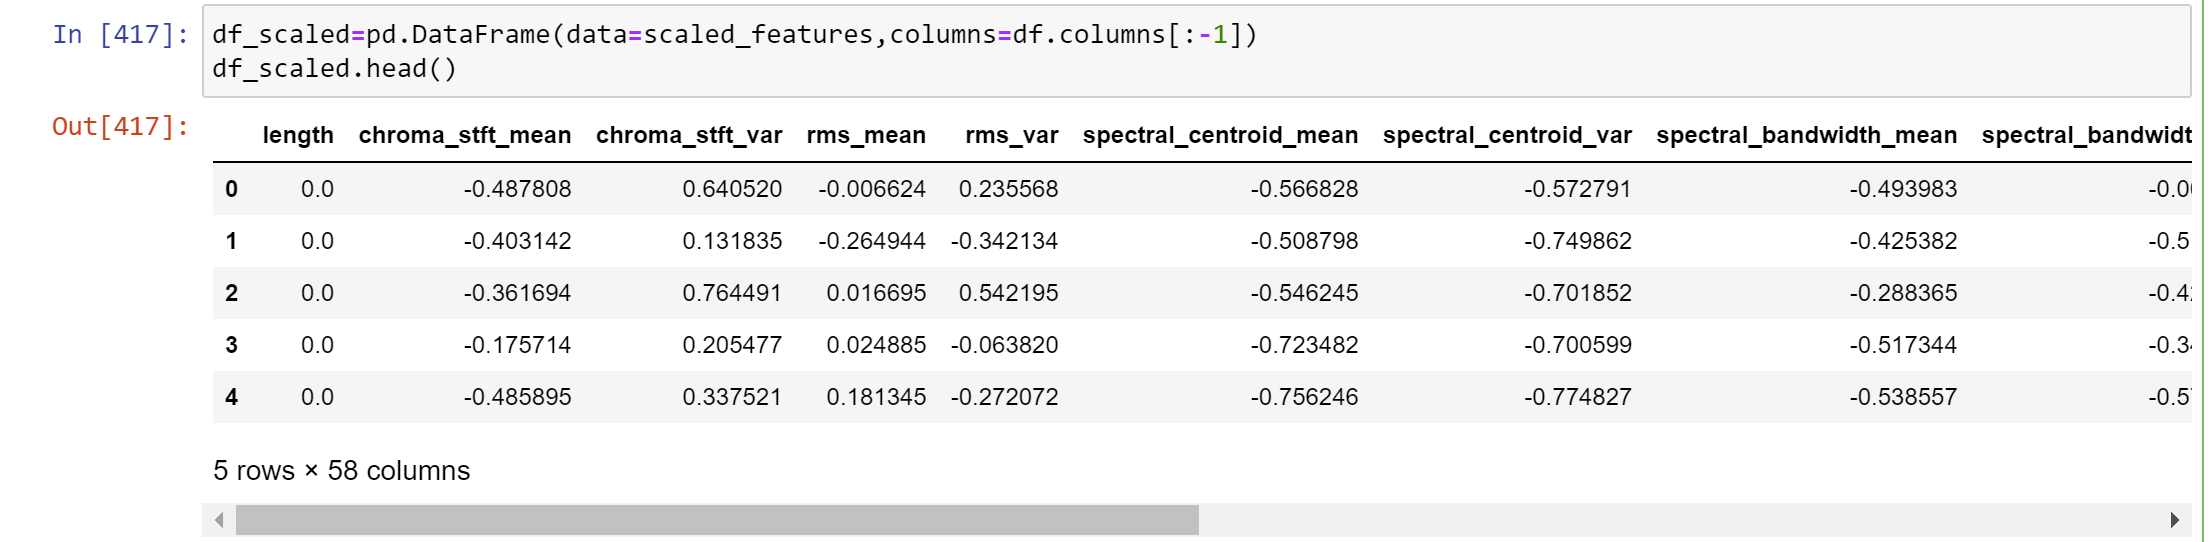

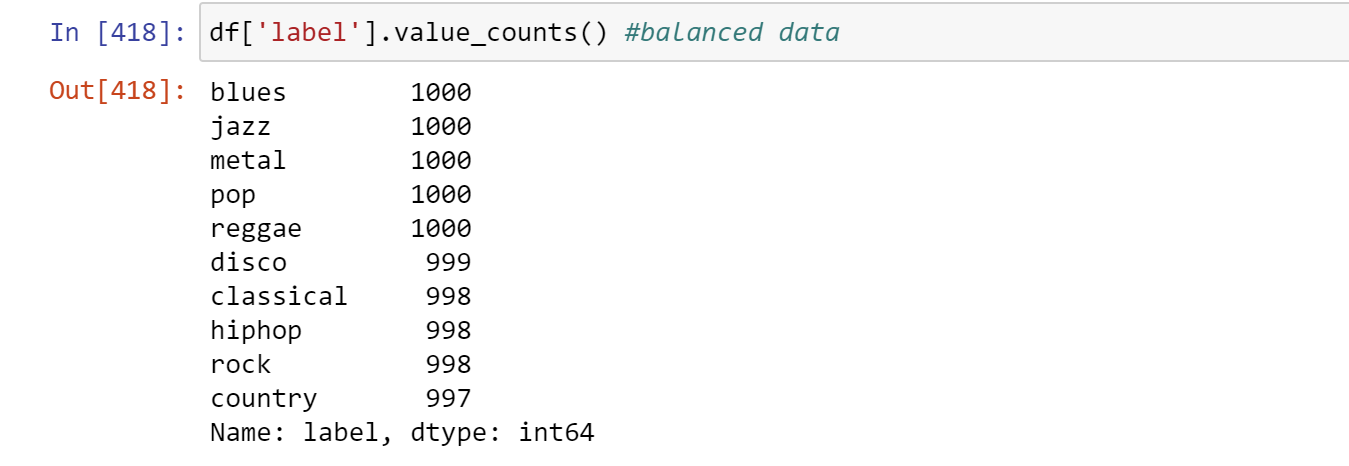

In [ ]:
X=df_scaled

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XGBOOST

In [ ]:
xbg = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
predictions=xgb.predict(X_test)

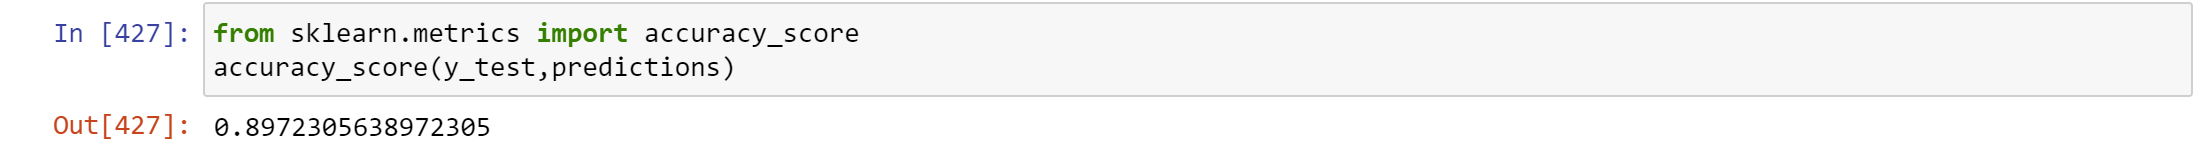

In [ ]:
y=df['label']

LIGHTGBM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lg = LGBMClassifier()

In [ ]:
lg.fit(X_train,y_train)

In [ ]:
pred_lg=lg.predict(X_test)

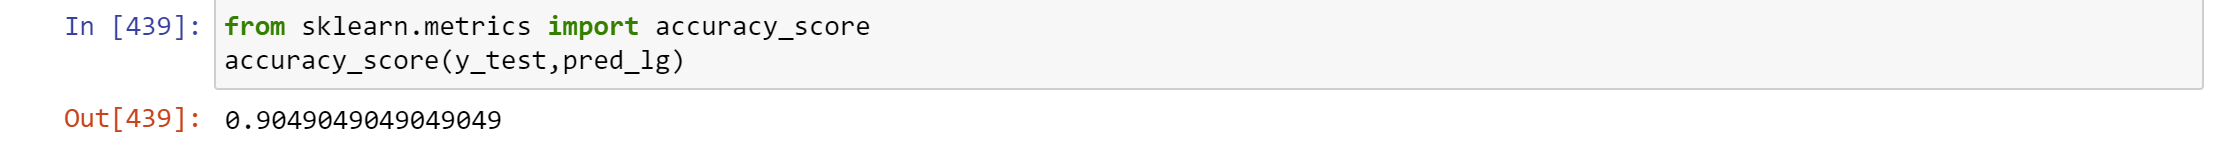

CATBOOST

In [ ]:
from catboost import CatBoostClassifier

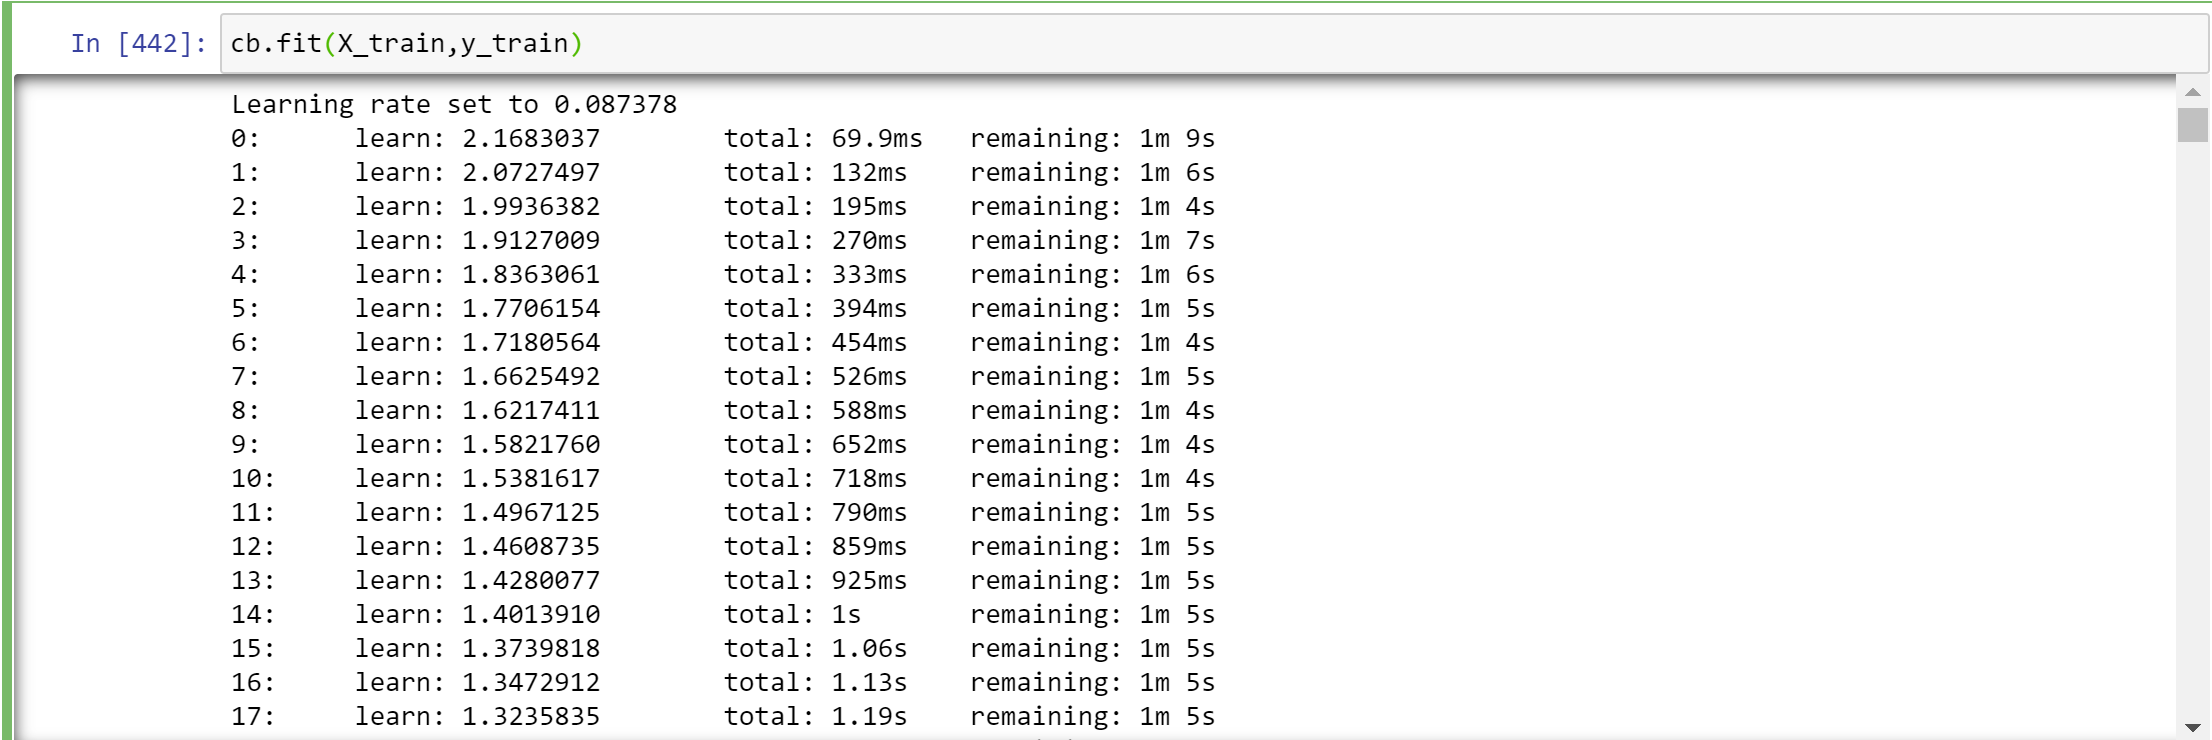

In [ ]:
cb_pred = cb.predict(X_test)

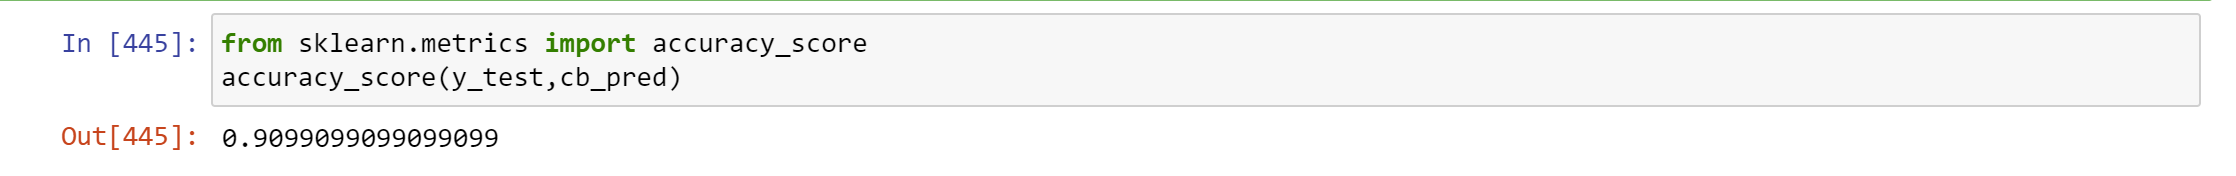

ARTIFICIAL NEURAL NETWORKS (sequential api)

In [ ]:
X=df_scaled
X=df_scaled.values

In [ ]:
y=pd.get_dummies(df['label'])

In [ ]:
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
ann=tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
ann.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

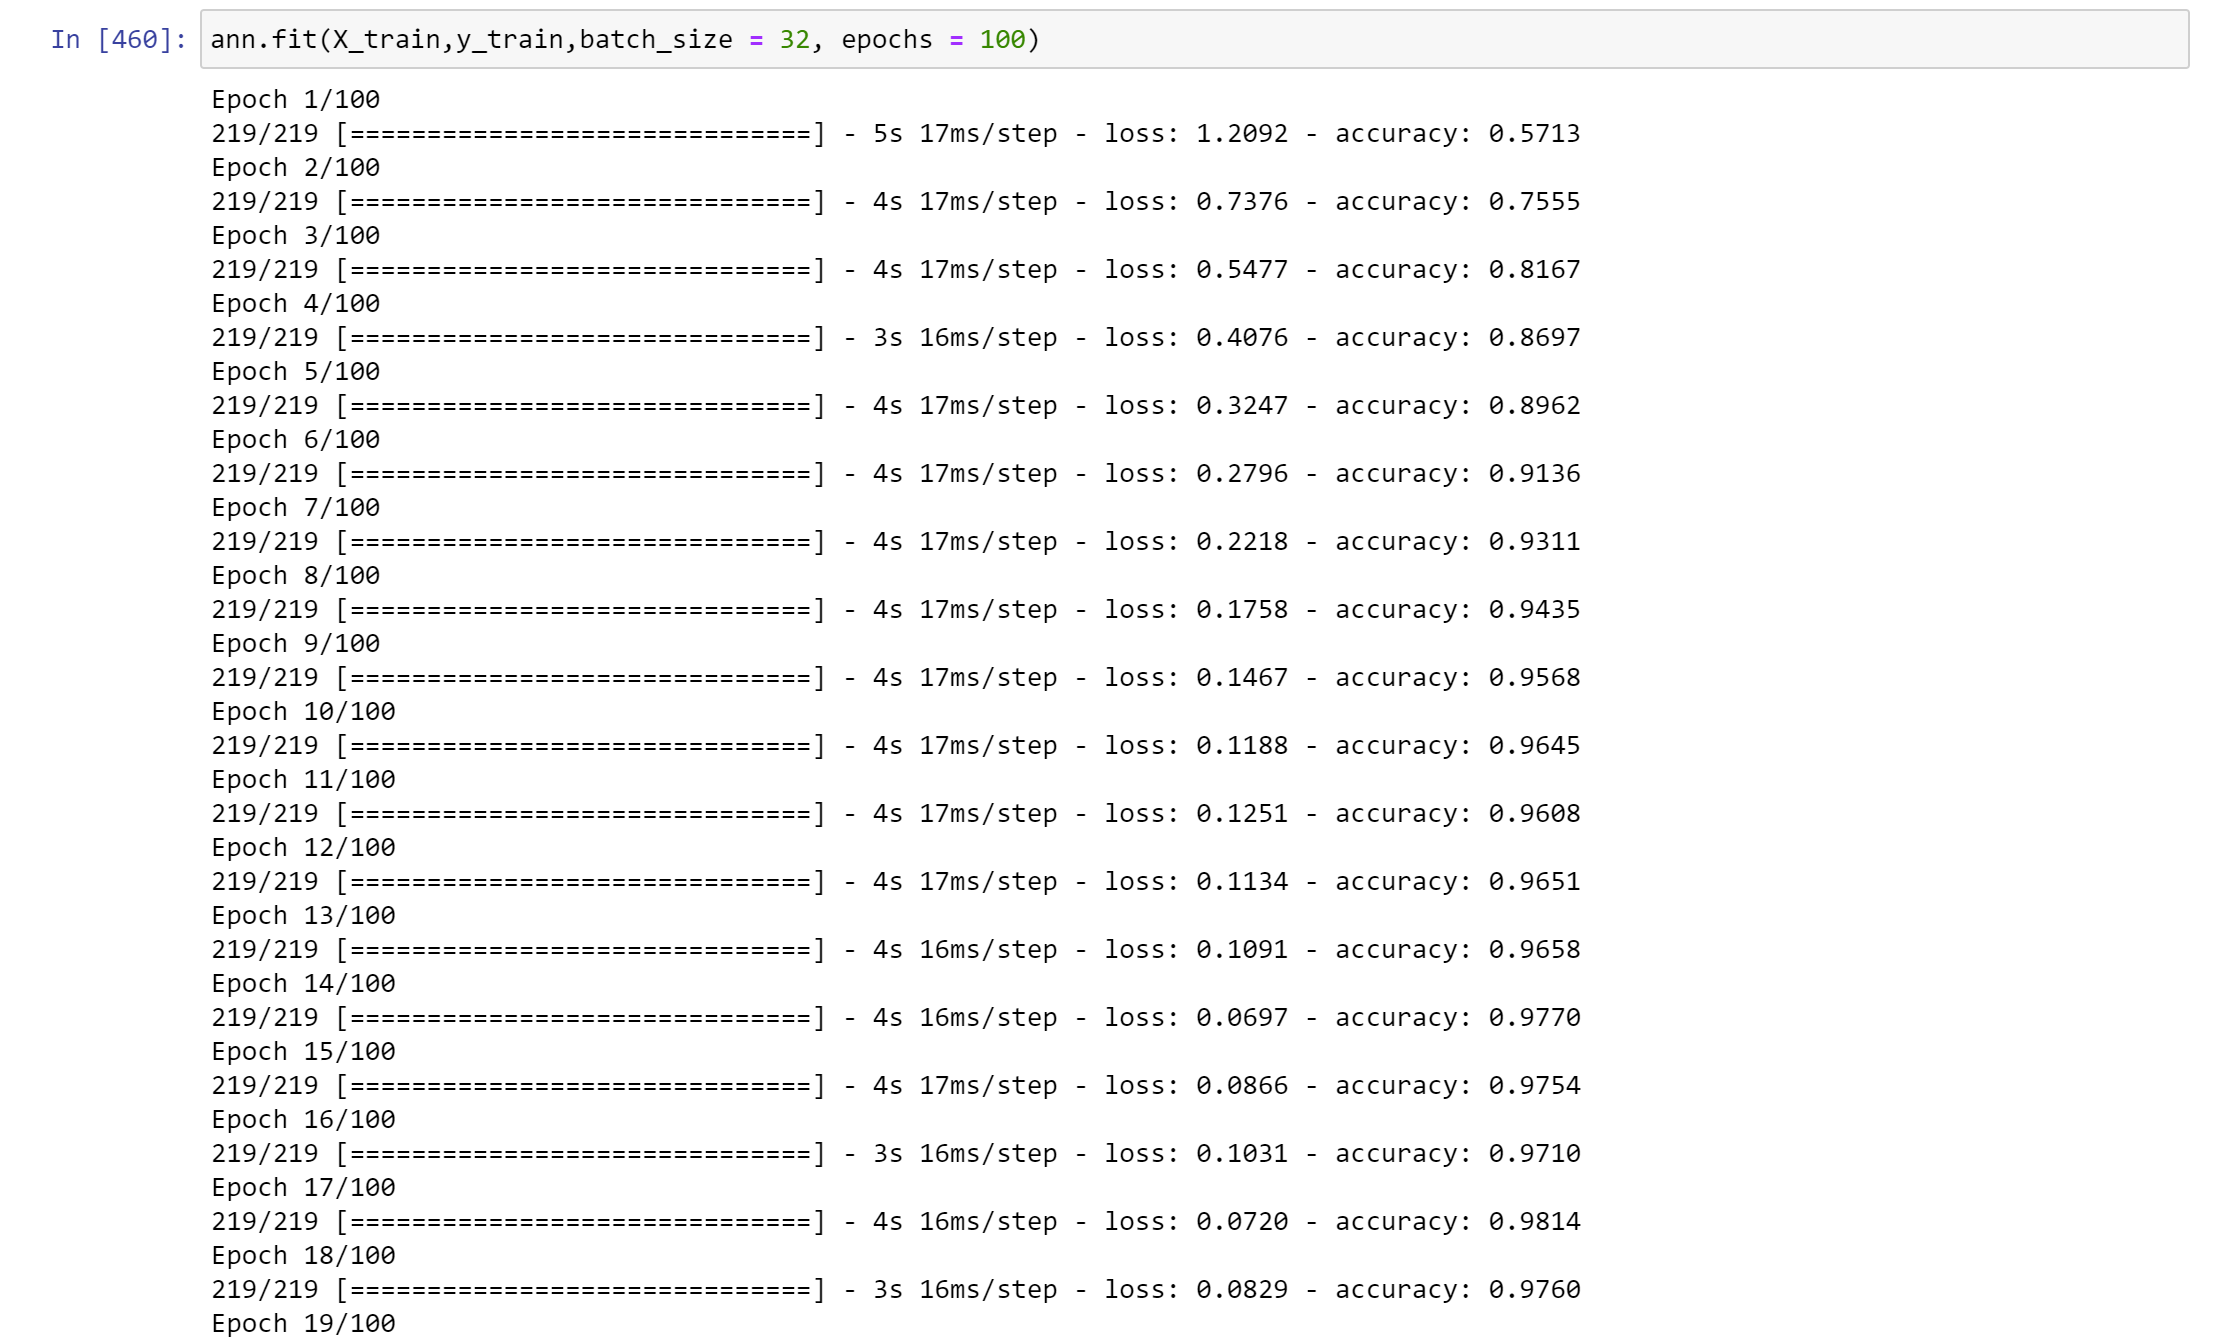

that went on till 100 epochs

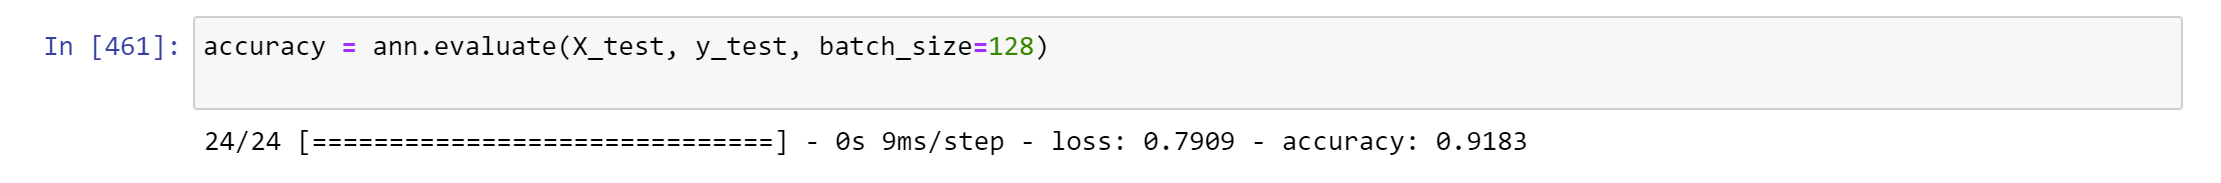

rankings of models of 3 sec dataset:
1. ANN
2. catboost
3. lightgbm
4. xgboost


Through our analysis, we have determined that both the 3-second and 30-second audio samples contain the same features, ensuring a fair comparison between the two durations. However, what we observed is that the accuracy rate achieved with the 3-second samples is notably higher at 91%, while the 30-second samples only achieve an accuracy rate of 80%.

This significant difference in accuracy suggests that the shorter 3-second samples provide more concentrated and representative information for our analysis. Despite having the same features, these shorter samples seem to capture the essential musical characteristics more effectively, enabling more accurate genre classification.

Given this finding, it is clear that in our specific project, a higher quantity of shorter audio samples proves to be more advantageous. By focusing on the 3-second samples, which exhibit a superior accuracy rate, we can harness the concentrated information they provide to achieve more reliable and precise outcomes in our genre classification analysis.

In order to generate mel spectrograms for the provided audio data, we will begin by breaking down the songs into 3-second audio samples. This will allow us to capture smaller segments of the songs for analysis. We will then use these audio samples to produce the mel spectrograms.

Mel spectrograms are a visual representation of the frequency content of audio signals over time. They provide valuable insights into the spectral characteristics of the audio, which can be useful for genre classification and other audio analysis tasks.

By segmenting the songs into 3-second samples, we can ensure that we capture diverse sections of the music, which may contain distinct genre-specific features. These samples will serve as the input for generating the mel spectrograms.

The mel spectrogram generation process involves transforming the audio samples into a logarithmic scale representation of their frequency content. This transformation helps emphasize important frequency bands and facilitates the extraction of meaningful features for our analysis.

Once we have obtained the mel spectrograms, we can further analyze and process them to extract relevant features for genre classification or any other desired task.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
import tensorflow as tf
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import librosa
import pydot
import pydub

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment

In [ ]:
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random

The provided code creates directories to organize the mel spectrograms of audio data. It first creates the main directory 'C:/Users/bathu/spectrograms3sec' to store all the spectrograms. Within this main directory, it creates two subdirectories: 'C:/Users/bathu/spectrograms3sec/train' for training spectrograms and 'C:/Users/bathu/spectrograms3sec/test' for testing spectrograms.

The code then defines a string variable genres containing the names of different genres. It splits this string into a list of individual genre names.

For each genre, it creates a directory to store the individual audio samples. The directory path is constructed using 'C:/Users/bathu/audio3sec' as the base directory and appending the genre name.

Finally, within each genre's directory, it creates two subdirectories: 'train' and 'test', to store the respective spectrograms. These subdirectories are created using the os.makedirs() function.

In summary, the code sets up the directory structure to organize mel spectrograms based on genres, with separate directories for training and testing data.

In [ ]:
import os

# Create main directories
os.makedirs('C:/Users/bathu/spectrograms3sec')
os.makedirs('C:/Users/bathu/spectrograms3sec/train')
os.makedirs('C:/Users/bathu/spectrograms3sec/test')

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()
for g in genres:
    path_audio = os.path.join('C:/Users/bathu/audio3sec', f'{g}')
    os.makedirs(path_audio)
    path_train = os.path.join('C:/Users/bathu/spectrograms3sec/train', f'{g}')
    path_test = os.path.join('C:/Users/bathu/spectrograms3sec/test', f'{g}')
    os.makedirs(path_train)
    os.makedirs(path_test)

In [ ]:
import os

# Specify the paths
main_dir = 'C:/Users/bathu/spectrograms3sec'
train_dir = 'C:/Users/bathu/spectrograms3sec/train'
test_dir = 'C:/Users/bathu/spectrograms3sec/test'

# Check if the directories exist
main_exists = os.path.exists(main_dir)
train_exists = os.path.exists(train_dir)
test_exists = os.path.exists(test_dir)

# Print the results
print(f"Main Directory exists: {main_exists}")
print(f"Train Directory exists: {train_exists}")
print(f"Test Directory exists: {test_exists}")

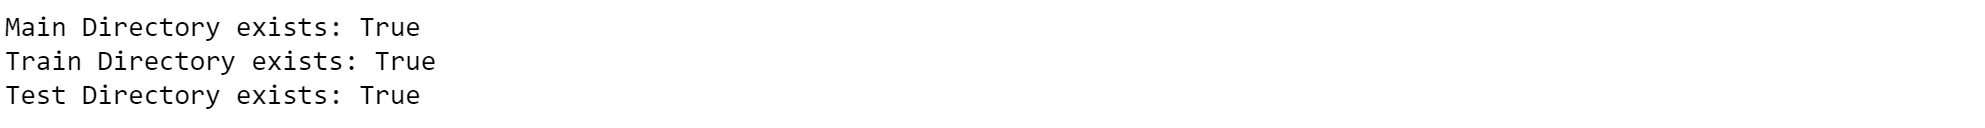

The provided code segment performs the task of segmenting audio files into 3-second samples and exporting them as separate WAV files. It first defines a list of music genres. Then, for each genre, it iterates through the audio files in the corresponding directory. Within a nested loop, it divides each audio file into 10 consecutive 3-second segments. It reads the audio file, selects the segment based on the calculated start and end times, and exports it as a new WAV file. The exported files are saved in a structured directory format, with separate subdirectories for each genre and unique filenames based on the genre, index, and segment number. Overall, the code effectively breaks down the audio data into smaller segments for further analysis and processing.

In [ ]:
import os
from pydub import AudioSegment

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

i = 0
for g in genres:
    j = 0
    print(f"{g}")
    for filename in os.listdir(os.path.join('C:/Users/bathu/genres_original', f"{g}")):
        song = os.path.join(f'C:/Users/bathu/genres_original/{g}', f'{filename}')
        j = j + 1
        for w in range(0, 10):
            i = i + 1
            t1 = 3 * w * 1000
            t2 = 3 * (w + 1) * 1000
            newAudio = AudioSegment.from_wav(song)
            new = newAudio[t1:t2]
            new.export(f'C:/Users/bathu/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

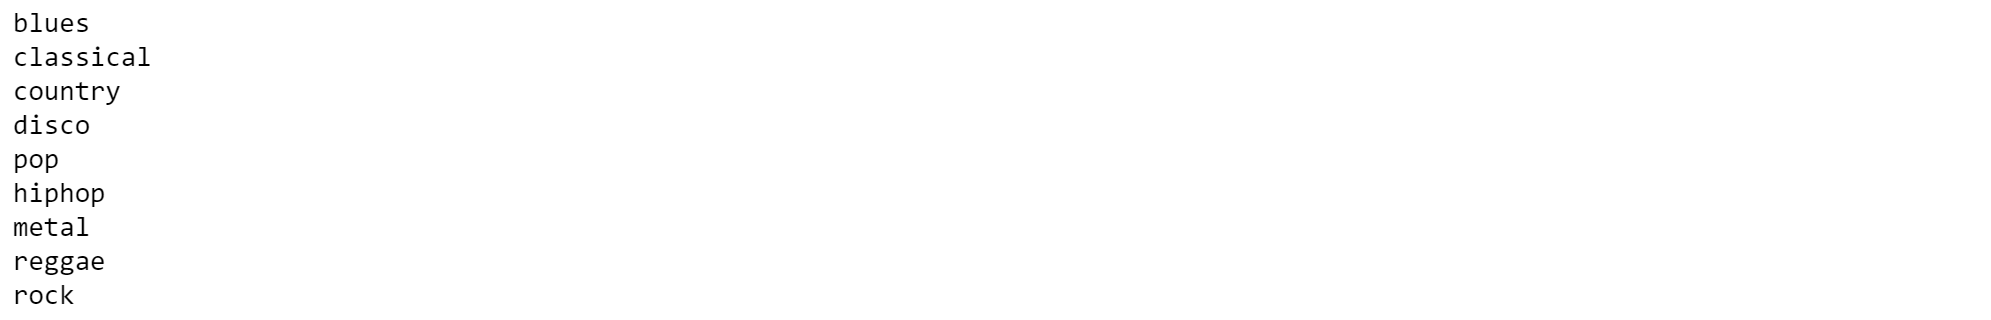

In [ ]:
   for g in genres:
    j = 0
    print(g)
    for filename in os.listdir(os.path.join('C:/Users/bathu/audio3sec', f"{g}")):
        song = os.path.join(f'C:/Users/bathu/audio3sec/{g}', f'{filename}')
        j = j + 1

        y, sr = librosa.load(song, duration=3)
        mels = librosa.feature.melspectrogram(y=y, sr=sr)
        fig = plt.figure()
        canvas = FigureCanvas(fig)
        p = plt.imshow(librosa.power_to_db(mels, ref=np.max))
        plt.savefig(f'C:\\Users\\bathu\\spectrograms3sec\\train\\{g}\\{g}{j}.png')

sending 100 images of each class to test folder

In [ ]:
import shutil

directory = "C:/Users/bathu/spectrograms3sec/train/"

for g in genres:
    filenames = os.listdir(os.path.join(directory, f"{g}"))
    random.shuffle(filenames)
    test_files = filenames[0:100]

    for f in test_files:
        shutil.move(directory + f"{g}" + "/" + f, "C:/Users/bathu/spectrograms3sec/test/" + f"{g}")

Utilizing a CNN model for genre classification, we exclude the genre "jazz" due to spectrogram generation limitations, focusing on accurately classifying the remaining genres based on properly generated spectrograms.

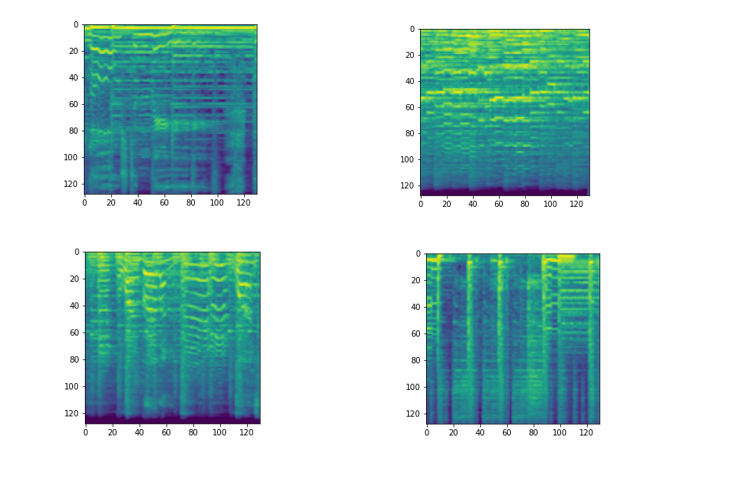

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(r"C:\Users\bathu\spectrograms3sec\train",
                                                 target_size = (288, 432),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        r"C:\Users\bathu\spectrograms3sec\test",
        target_size=(288, 432),
        batch_size=32,
        class_mode='categorical')

CNN (sequestial api)

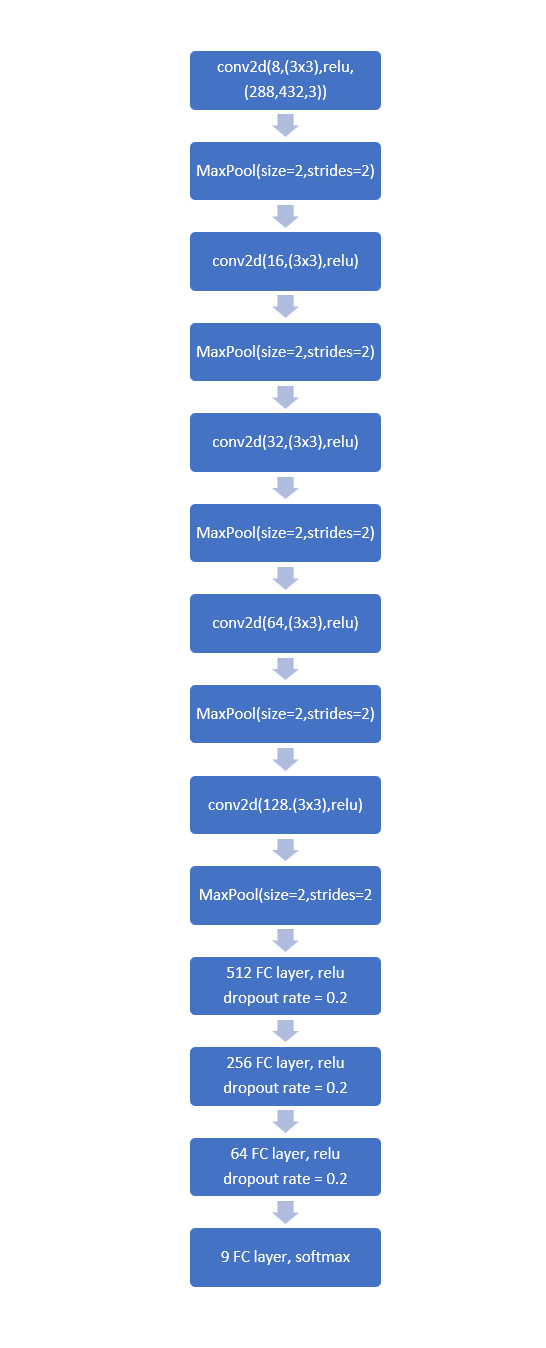

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 8,kernel_size=3,activation='relu',input_shape=(288,432,3)))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 16,kernel_size=3,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size=3,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 128,kernel_size=3,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x=training_set,validation_data=validation_generator,epochs=25)

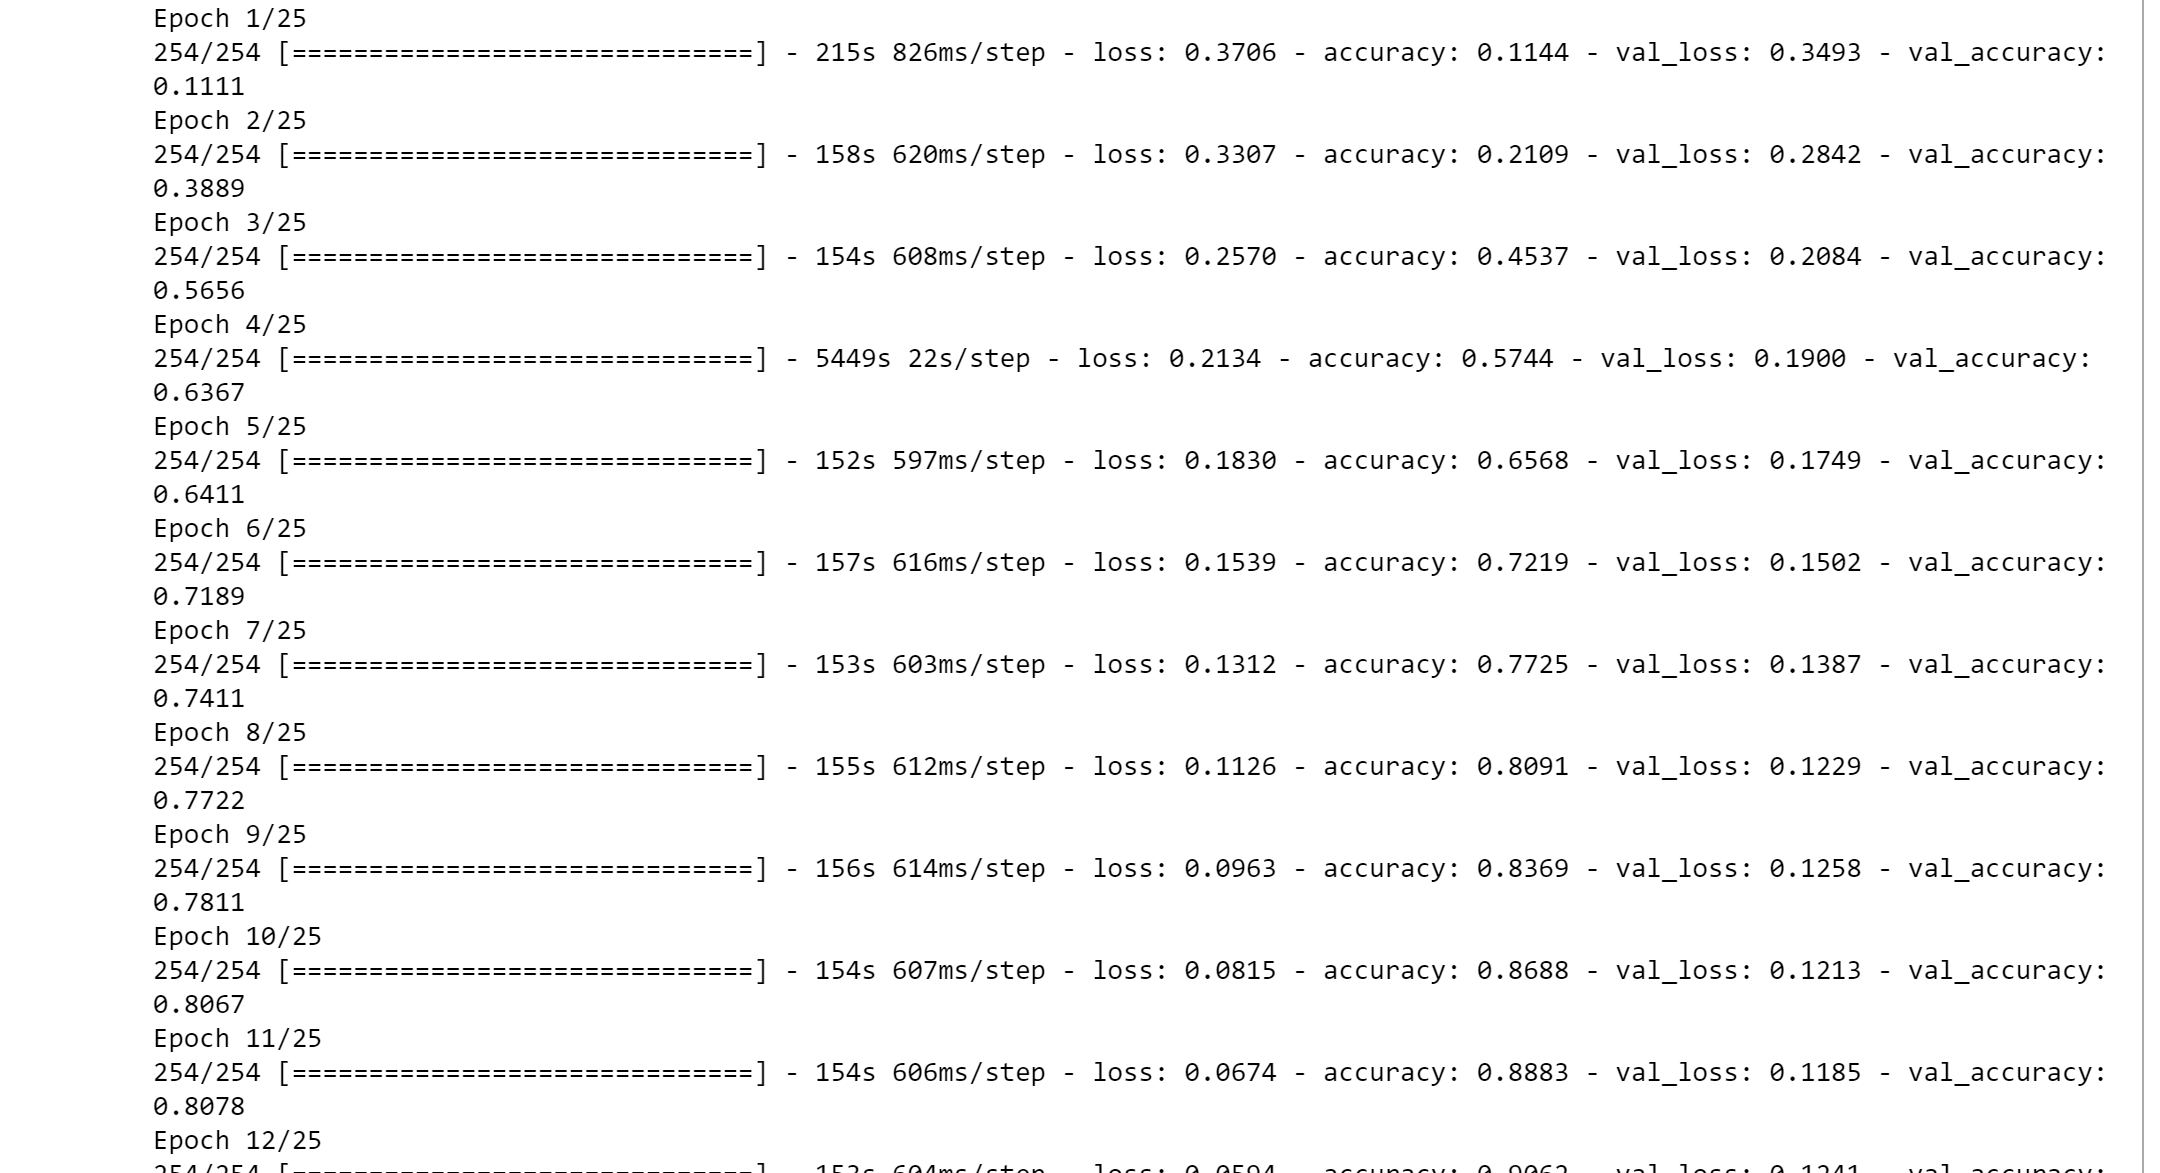

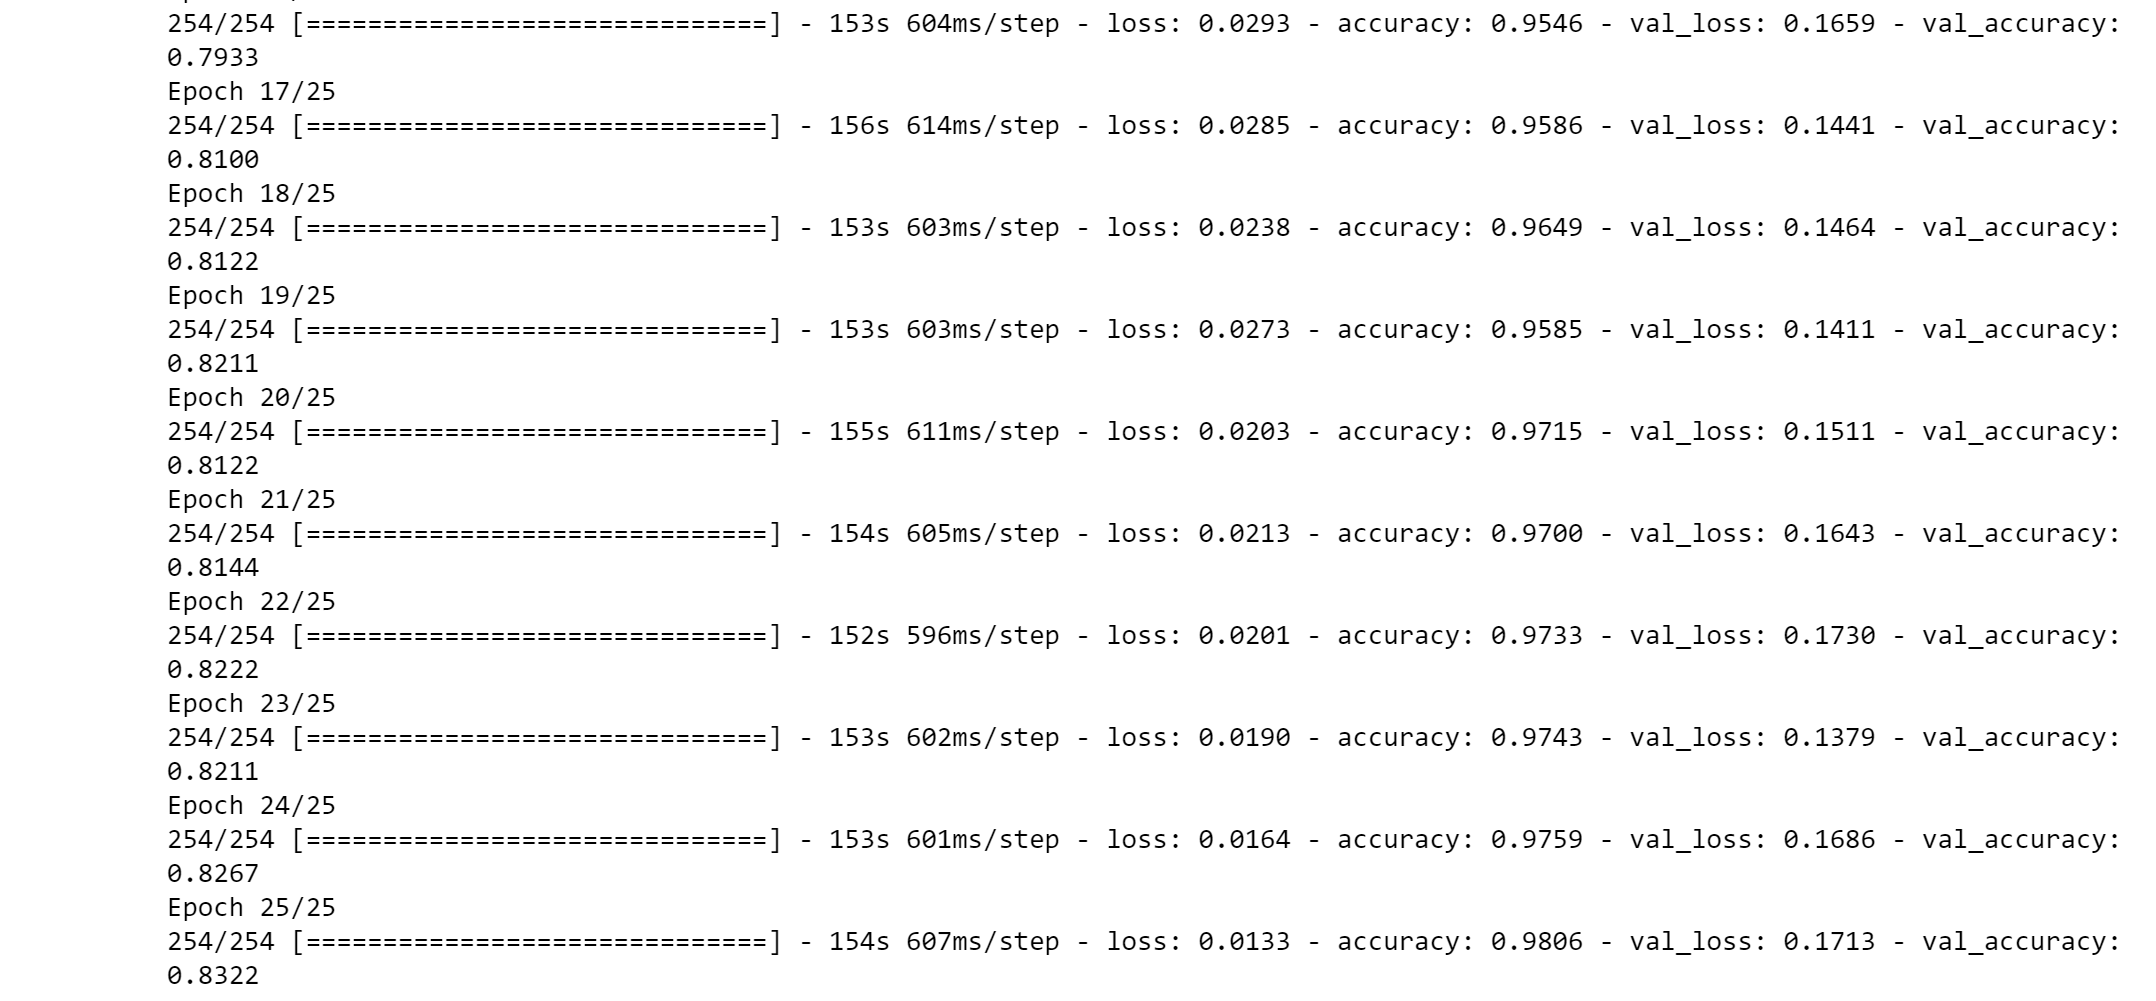

The implemented CNN model has achieved an accuracy rate of 83% in classifying the remaining genres, demonstrating its effectiveness in accurately categorizing music based on properly generated spectrograms.